# COVID-19 Mortality Prediction with Support Vector Regression Model

### Dependencies importing

In [1]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
### TBE -> To Be Engineering...
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *

project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/.env
project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/covid_ts_pred/.env


In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
### TBE done!
country='India'

In [6]:
### TBE done!
data_index = pd.read_csv(get_csv_out_path(f'index_{country}.csv'))

NameError: name 'd' is not defined

In [7]:
data_index.head()

NameError: name 'data_index' is not defined

In [ ]:
data_index=data_index.set_index('date')

In [ ]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.052510,0.073003,0.222387,330.0,86.0,4.0,0.0,0.064820,0.0,0.0,...,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-03-22,0.132254,0.164272,0.222387,396.0,66.0,7.0,3.0,0.138645,0.0,0.0,...,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
2020-03-23,0.118155,0.142210,0.222387,499.0,103.0,10.0,3.0,0.125595,0.0,0.0,...,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0
2020-03-24,0.118155,0.142210,0.222387,536.0,37.0,10.0,0.0,0.125595,0.0,0.0,...,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0
2020-03-25,0.132254,0.164272,0.222387,657.0,121.0,12.0,2.0,0.138645,0.0,0.0,...,10.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0


In [ ]:
data_index=data_index.fillna(0)

In [ ]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.052510,0.073003,0.222387,330.0,86.0,4.0,0.0,0.064820,0.0,0.0,...,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-03-22,0.132254,0.164272,0.222387,396.0,66.0,7.0,3.0,0.138645,0.0,0.0,...,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
2020-03-23,0.118155,0.142210,0.222387,499.0,103.0,10.0,3.0,0.125595,0.0,0.0,...,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0
2020-03-24,0.118155,0.142210,0.222387,536.0,37.0,10.0,0.0,0.125595,0.0,0.0,...,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0
2020-03-25,0.132254,0.164272,0.222387,657.0,121.0,12.0,2.0,0.138645,0.0,0.0,...,10.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0


Text(0.5, 0, 'Date')

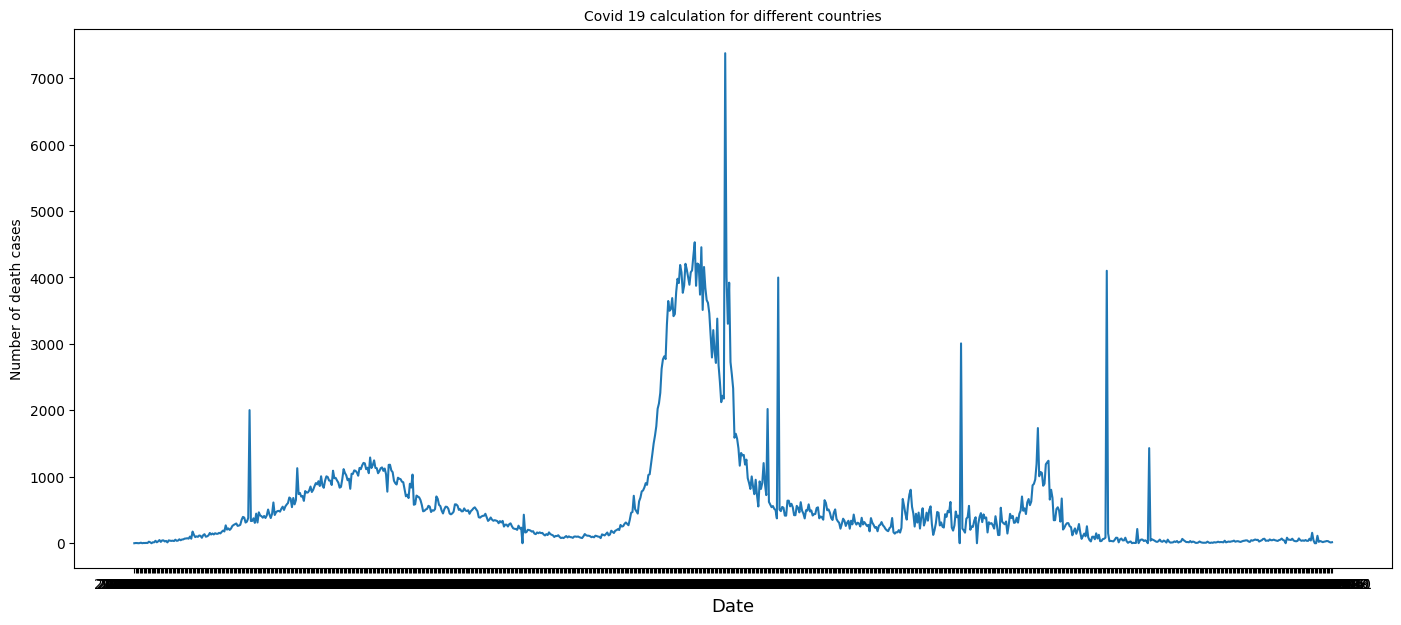

In [ ]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

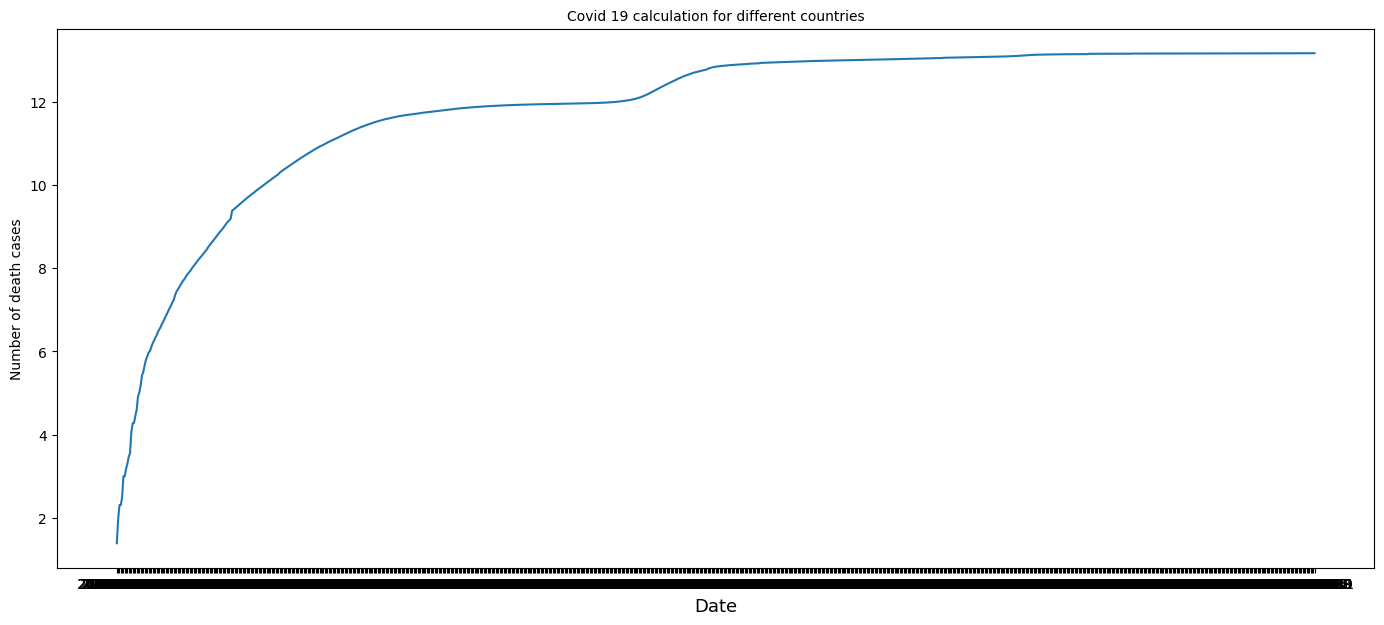

In [ ]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index[:925],np.log(data_index['total_deaths'][:925]));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

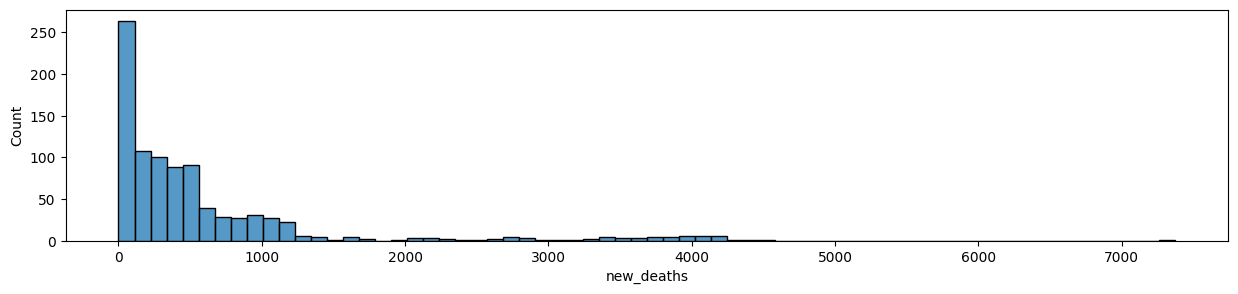

In [ ]:

plt.figure(figsize=(15,3))
sns.histplot(data_index['new_deaths'])

# splitting of data into x and y

In [ ]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

In [ ]:
X

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,
2020-03-21,0.052510,0.073003,0.222387,330.0,0.064820,0.000000e+00,0.000000e+00,0.0,0.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0
2020-03-22,0.132254,0.164272,0.222387,396.0,0.138645,0.000000e+00,0.000000e+00,0.0,0.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
2020-03-23,0.118155,0.142210,0.222387,499.0,0.125595,0.000000e+00,0.000000e+00,0.0,0.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0
2020-03-24,0.118155,0.142210,0.222387,536.0,0.125595,0.000000e+00,0.000000e+00,0.0,0.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0,2.0
2020-03-25,0.132254,0.164272,0.222387,657.0,0.138645,0.000000e+00,0.000000e+00,0.0,0.0,10.0,10.0,7.0,4.0,5.0,4.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-07,0.075366,0.060846,0.000000,44478636.0,0.069763,2.139660e+09,1.025025e+09,943959568.0,170674857.0,528057.0,528030.0,528007.0,527991.0,527965.0,527932.0,527911.0,527799.0,527799.0,527799.0
2022-09-08,0.075366,0.060846,0.000000,44484729.0,0.069763,2.143231e+09,1.025117e+09,944241171.0,173873302.0,528090.0,528057.0,528030.0,528007.0,527991.0,527965.0,527932.0,527911.0,527799.0,527799.0
2022-09-09,0.075366,0.060846,0.000000,44490283.0,0.069763,2.145937e+09,1.025201e+09,944541113.0,176194858.0,528121.0,528090.0,528057.0,528030.0,528007.0,527991.0,527965.0,527932.0,527911.0,527799.0


## scaling data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# splitting data into train and test set

In [ ]:
n = len(X)
X_train = X[0:int(n-15)]
X_test=X[int(n-15):]
y_train=y[0:int(n-15)]
y_test=y[int(n-15):]

In [ ]:
X_test_columns=data_index.drop(columns=['total_deaths','new_cases','new_deaths'])
X_test_columns.columns

Index(['containment_and_health', 'stringency', 'economics_sup', 'total_cases',
       'gov_response', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'day-1', 'day-2', 'day-3',
       'day-4', 'day-5', 'day-6', 'day-7', 'day-8', 'day-9', 'day-10'],
      dtype='object')

In [ ]:
X_test_df=pd.DataFrame(X_test,columns=X_test_columns.columns)
X_predict=X_test_df.tail(10)
X_predict=X_predict.reset_index(drop=True)

In [ ]:
X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.999360,0.997706,0.892257,0.999587,0.999568,0.999390,0.999449,0.999511,0.999477,0.999223,0.999176,0.999097,0.999091
1,0.233868,0.0,0.0,0.999010,0.054643,0.990857,0.999441,0.997956,0.904607,0.999650,0.999608,0.999602,0.999449,0.999511,0.999563,0.999521,0.999254,0.999225,0.999159
2,0.233868,0.0,0.0,0.999143,0.054643,0.991878,0.999513,0.998226,0.914980,0.999699,0.999671,0.999642,0.999661,0.999511,0.999563,0.999606,0.999551,0.999303,0.999288
3,0.233868,0.0,0.0,0.999242,0.054643,0.993238,0.999578,0.998527,0.929296,0.999729,0.999720,0.999705,0.999701,0.999724,0.999563,0.999606,0.999636,0.999600,0.999365
4,0.233868,0.0,0.0,0.999305,0.054643,0.994158,0.999635,0.998723,0.938938,0.999773,0.999750,0.999754,0.999763,0.999763,0.999775,0.999606,0.999636,0.999686,0.999663
5,0.233868,0.0,0.0,0.999507,0.054643,0.995134,0.999702,0.998930,0.949136,0.999824,0.999794,0.999784,0.999813,0.999826,0.999814,0.999818,0.999636,0.999686,0.999748
6,0.233868,0.0,0.0,0.999644,0.054643,0.996795,0.999791,0.999228,0.966923,0.999886,0.999845,0.999828,0.999843,0.999875,0.999877,0.999858,0.999848,0.999686,0.999748
7,0.233868,0.0,0.0,0.999769,0.054643,0.998053,0.999874,0.999546,0.979833,0.999945,0.999907,0.999879,0.999886,0.999905,0.999926,0.999920,0.999888,0.999898,0.999748
8,0.233868,0.0,0.0,0.999883,0.054643,0.999048,0.999940,0.999748,0.990283,0.999979,0.999966,0.999941,0.999938,0.999949,0.999956,0.999970,0.999951,0.999937,0.999960
9,0.233868,0.0,0.0,1.000000,0.054643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for i in range(1,10):
    X_predict.loc[i,'containment_and_health':'total_boosters']=X_predict.loc[0,'containment_and_health':'total_boosters']
    

X_predict

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999587,9.995683e-01,9.993903e-01,0.999449,0.999511,0.999477,0.999223,0.999176,0.999097,0.999091
1,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,519195.578149,9.996081e-01,9.996024e-01,0.999449,0.999511,0.999563,0.999521,0.999254,0.999225,0.999159
2,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999699,4.681485e+33,9.996421e-01,0.999661,0.999511,0.999563,0.999606,0.999551,0.999303,0.999288
3,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999729,9.997198e-01,-2.360925e+258,0.999701,0.999724,0.999563,0.999606,0.999636,0.999600,0.999365
4,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999773,9.997501e-01,9.997538e-01,NaN,0.999763,0.999775,0.999606,0.999636,0.999686,0.999663
5,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999824,9.997936e-01,9.997841e-01,0.999813,0.999826,0.999814,0.999818,0.999636,0.999686,0.999748
6,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999886,9.998447e-01,9.998277e-01,0.999843,0.999875,0.999877,0.999858,0.999848,0.999686,0.999748
7,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999945,9.999072e-01,9.998788e-01,0.999886,0.999905,0.999926,0.999920,0.999888,0.999898,0.999748
8,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999979,9.999659e-01,9.999413e-01,0.999938,0.999949,0.999956,0.999970,0.999951,0.999937,0.999960
9,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
min_num=y_test[0]
max_num=y_test[-1]
min_num
max_num

In [ ]:
list_pred=[]


for j in range(0,10):
    y_pred_=model.predict(pd.DataFrame(X_predict.loc[j]).T)
    list_pred.append(y_pred_)
    
    y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
    
    #X_predict[j+1,f'day-{j+1}']=y_pred_
    X_predict.at[j+1,f'day-{j+1}']=y_pred_scale
    
    
   

#do min max scaler and tranform y_pred1
    



X_predict
list_prediction

/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sumedha/.pyenv/versions/lewagon/envs/covid_tsp_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/home/sume

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999587,0.999568,0.999390,0.999449,0.999511,0.999477,0.999223,0.999176,0.999097,0.999091
1,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.983018,0.999608,0.999602,0.999449,0.999511,0.999563,0.999521,0.999254,0.999225,0.999159
2,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999699,0.966079,0.999642,0.999661,0.999511,0.999563,0.999606,0.999551,0.999303,0.999288
3,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999729,0.999720,0.978957,0.999701,0.999724,0.999563,0.999606,0.999636,0.999600,0.999365
4,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999773,0.999750,0.999754,0.985353,0.999763,0.999775,0.999606,0.999636,0.999686,0.999663
5,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999824,0.999794,0.999784,0.999813,0.982635,0.999814,0.999818,0.999636,0.999686,0.999748
6,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999886,0.999845,0.999828,0.999843,0.999875,0.984166,0.999858,0.999848,0.999686,0.999748
7,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999945,0.999907,0.999879,0.999886,0.999905,0.999926,0.983044,0.999888,0.999898,0.999748
8,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999979,0.999966,0.999941,0.999938,0.999949,0.999956,0.999970,0.983461,0.999937,0.999960
9,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.983403,1.000000


In [ ]:
list_pred[0][0]

519195.5781490885

In [ ]:
pd.DataFrame(X_predict.loc[0]).T

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
0,0.233868,0.0,0.0,0.998857,0.054643,0.989675,0.99936,0.997706,0.892257,0.999587,0.999568,0.99939,0.999449,0.999511,0.999477,0.999223,0.999176,0.999097,0.999091


# Model

In [ ]:
model =SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

In [ ]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.3s
[CV] END ..............C=5, coef0=0.01, degree=8, kernel=rbf; total time=   0.2s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=0.5, degree=8, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=10, degree=8, kernel=poly; total time=   7.3s
[CV] END ................C=6, coef0=10, degree=8, kernel=rbf; total time=   0.1s
[CV] END ................C=6, coef0=10, degree=8, kernel=rbf; total time=   0.0s
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.3s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.1s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.1s
[CV] END ..............C=5, coef0=0.5, degree=8, kernel=poly; total time=   0.1s
[CV] END ...............C=5, coef0=10, degree=3,

## fitting the model for train and test set

In [ ]:

model.fit(X_train,y_train)

SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

## prediction

In [ ]:
y_pred=model.predict(X_test)

## evaluating model performance

In [ ]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.010515389458774694

In [ ]:
y_pred.shape

Text(0.5, 0, 'Date')

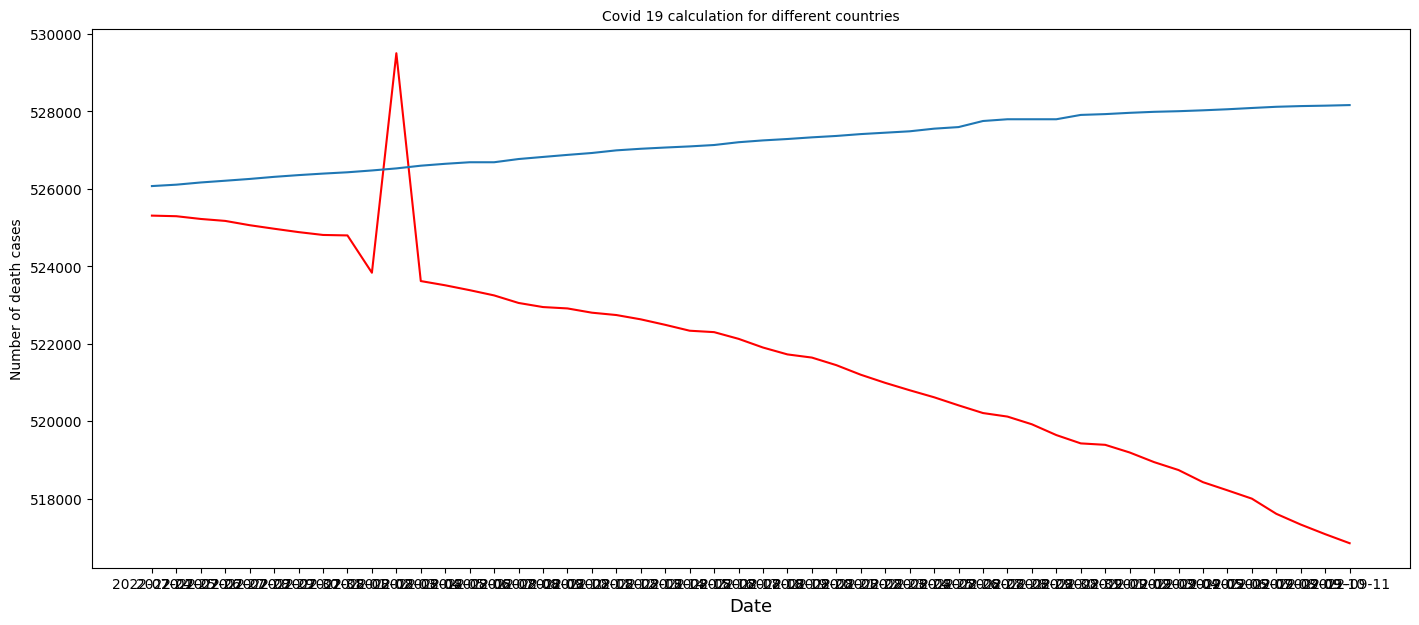

In [ ]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index,y_pred,color='r');
plt.plot(y_test.index,y_test);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

In [ ]:
X_test_columns=data_index.drop(columns=['total_deaths','new_cases','new_deaths'])
X_test_columns.columns

In [ ]:
X_test_df=pd.DataFrame(X_test,columns=X_test_columns.columns)
X_predict=X_test_df.tail(10)
X_predict=X_predict.reset_index(drop=True)

In [ ]:
for i in range(1,10):
    X_predict.loc[i,'containment_and_health':'total_boosters']=X_predict.loc[0,'containment_and_health':'total_boosters']
    

X_predict

In [ ]:
min_num=y_test[0]
max_num=y_test[-1]
min_num
max_num

In [ ]:
list_pred=[]


for j in range(0,11):
    y_pred_=model.predict(pd.DataFrame(X_predict.loc[j]).T)
    list_pred.append(y_pred_)
    
    y_pred_scale=((y_pred_)-min_num) / ((max_num)-(min_num))
    
    #X_predict[j+1,f'day-{j+1}']=y_pred_
    X_predict.at[j+1,f'day-{j+1}']=y_pred_scale